In [1]:
import yahoo
import pandas as pd

In [2]:
puts = pd.read_csv('outputs/puts_output.csv')
calls = pd.read_csv('outputs/calls_output.csv')

data = pd.concat([puts, calls])

data['SD/MA'] = data['STD']/data['MA']
data['% MA to adj'] = ((data['adjclose']/data['MA'])-1).apply(lambda x: abs(x))
data['% ADJ to Strike'] = ((data['Strike']/data['adjclose'])-1).apply(lambda x: abs(x))
data[['SD/MA','% MA to adj','% ADJ to Strike', 'Return']]

,SD/MA,% MA to adj,% ADJ to Strike,Return
0,0.049783,0.054991,0.052347,0.020000
1,0.041441,0.001399,0.050027,0.022581
2,0.069410,0.173653,0.107143,0.012800
3,0.065940,0.077343,0.114204,0.019643
4,1.003721,0.111698,0.720410,0.020000
...,...,...,...,...
174,0.054372,0.172531,0.152953,0.238000
175,0.177233,0.304928,0.061008,0.127500
176,0.153487,0.089771,0.286174,0.017500
177,0.166065,0.315954,0.049869,0.017500


In [3]:
#calls first
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data[['SD/MA','% MA to adj','% ADJ to Strike', 'Return']], data['Assigned'], test_size=0.90, random_state=42)


In [4]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
def plot_metric(clf, testX, testY, name):
    """
    Small function to confusion matrix
    """
    plt.style.use('ggplot')
    plot_confusion_matrix(clf, testX, testY, normalize='true')
    plt.title(f"Confusion Matrix [{name}]")

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(trainX, trainY)
print(f"Validation Accuracy of Random Forest Classifier is: {(rf_classifier.score(validX, validY))*100:.2f}%")

Validation Accuracy of Random Forest Classifier is: 78.54%


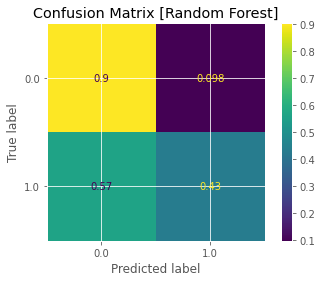

In [6]:
plot_metric(rf_classifier, validX, validY, "Random Forest")

In [7]:
rf_classifier.feature_importances_

array([0.15206334, 0.27742555, 0.32879413, 0.24171698])

In [8]:
import numpy as np
sample_test = np.array([0.583691767213275/11.7247619174776, (11.0799999237061/11.7247619174776)-1, (10.5/11.0799999237061)-1,.01])
#sample_test.reshape(1,-1)

In [9]:
rf_classifier.predict(sample_test.reshape(1,-1))

array([1.])

In [10]:
rf_classifier.predict(validX)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
validY.values

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [64]:
rf_classifier.predict(validX) == validY.values

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [65]:
(validY.values == 1) == (rf_classifier.predict(validX) != validY.values)

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [77]:
validX['Return']

0.0107142857142857